In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.interpolate import UnivariateSpline
import scipy.optimize as opt

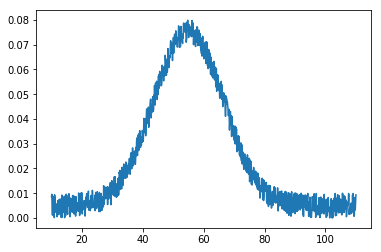

In [2]:
def _make_norm_dist(x, mean, sd):
    return 1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2*sd**2))

nbr_points = 1000
x = np.linspace(10, 110, nbr_points)
green = _make_norm_dist(x, 50, 10)
pink = _make_norm_dist(x, 60, 10)
blue = green + pink
noisy_blue = blue + .010 * np.random.random(nbr_points)
#res = find_fwhm_points(x, noisy_blue)
plt.plot(x, noisy_blue)

In [3]:
def gauss(x, p): # p[0]==mean, p[1]==stdev
    return 1.0/(p[1]*np.sqrt(2*np.pi))*np.exp(-(x-p[0])**2/(2*p[1]**2))

# Create some sample data
known_param = np.array([2.0, .7])
xmin,xmax = -1.0, 5.0
N = 1000

X = np.linspace(xmin,xmax,N)
Y = gauss(X, known_param)

# Add some noise
Y += .10*np.random.random(N)

# Renormalize to a proper PDF
Y /= ((xmax-xmin)/N)*Y.sum()

# Fit a guassian
p0 = [0,1] # Inital guess is a normal distribution
errfunc = lambda p, x, y: gauss(x, p) - y # Distance to the target function
p1, success = opt.leastsq(errfunc, p0[:], args=(X, Y))

fit_mu, fit_stdev = p1

FWHM = 2*np.sqrt(2*np.log(2))*fit_stdev
print( "FWHM", FWHM)

FWHM 2.01185081036


In [23]:
with open(r'c:\Temp\enlight\tidy_sumhisto_6.txt') as readfile:
    data = np.loadtxt(readfile)


(300,)

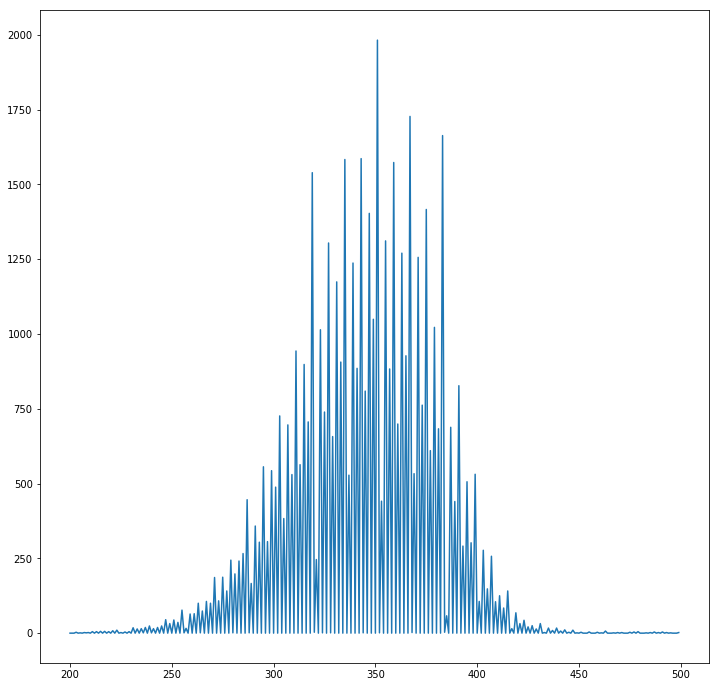

In [133]:
plt.figure(figsize=(12,12))
xs = np.arange(200, 500, 1)
plt.plot(xs, data[200:500])
#plt.xlim((200, 500))
xs.shape

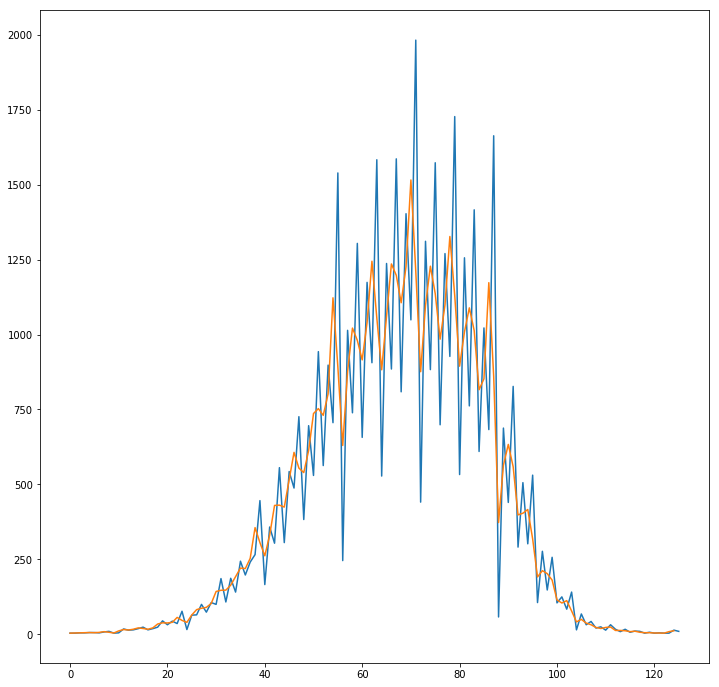

In [68]:
plt.figure(figsize=(12,12))
do3 = data[data>3.0]
plt.plot(do3)
plt.plot((do3[0:-1] + do3[1:])/2)

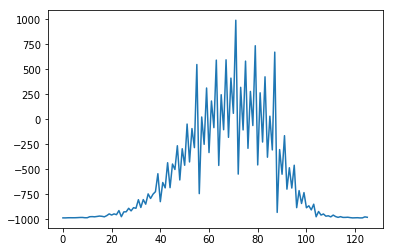

In [91]:
y = do3
x = np.arange(0, y.shape[0])
spline = UnivariateSpline(x, y - np.max(y) / 2, s=None, k=5)
#print(spline.roots(), spline.get_knots())
plt.plot(x, spline(x))

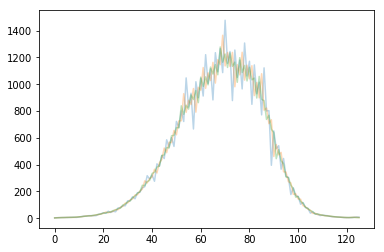

In [134]:
no_convolved = np.arange(3, 9, 2)
#plt.figure(figsize=(12,12))
for nc in no_convolved:
    yc = np.convolve(y, np.ones((nc,))/nc, mode='same')
    plt.plot(x, yc, alpha=0.3)

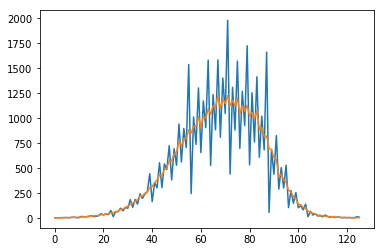

In [138]:
no_convolved = [1, 9]
#plt.figure(figsize=(9,9))
for nc in no_convolved:
    yc = np.convolve(y, np.ones((nc,))/nc, mode='same')
    plt.plot(x, yc, alpha=1)

[ 50.55993515  89.22548601]


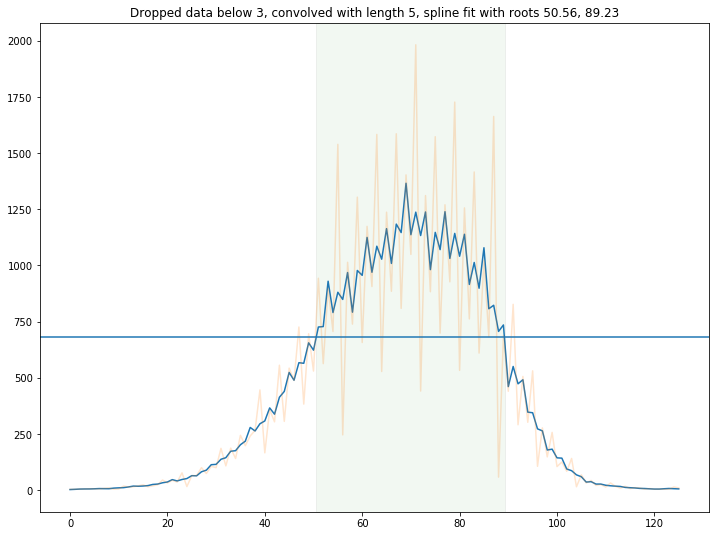

In [140]:
nc = 5
yc = np.convolve(y, np.ones((nc,))/nc, mode='same')
spline = UnivariateSpline(x, yc - np.max(yc) / 2, s=None, k=3)
roots = spline.roots() 
print(roots)
plt.figure(figsize=(12,9))
plt.plot(x, yc, alpha=1)
plt.plot(x, y, alpha=0.2)
plt.axhline(np.max(yc)/2)
plt.title('Dropped data below 3, convolved with length %d,'
          ' spline fit with roots %.2f, %.2f' % (nc, roots[0], roots[1]))
plt.axvspan(roots[0], roots[1], facecolor='g', alpha=0.05, edgecolor='k');
plt.savefig('c:/Temp/fwhm.jpg')